# Live Coding Session 2:
What you will learn in this session:
 * Control Structures in Python
     * Conditional Processing (if-then-else)
     * Looped Processing (for- and while-loops)
 * Type conversion (casting)
 * Numpy
 * Matplotlib
 

## Task Description: 
The task, which has already been sketched in [Session1](Session1.ipynb) will be solved in this notebook. Instead of using only a few own-defined data instances, we import a comprehensive dataset from the publically available [insurance dataset](../../R/Lecture/data/insurance.csv) 

## For Loop
In this example only the basic usage of for-loops is demonstrated. The subject is described more thouroughly in notebook [04ControllStructures.ipynb](../Lecture/04ControllStructures.ipynb).


**Tasks:**
1. Read all data from the file [insurance dataset](../../R/Lecture/data/insurance.csv), into a nested list, i.e. each row in the file shall be represented by a single list (inner lists) and all of these inner lists shall be aggregated in an outer list. Use a for-loop for the line-by-line reading-process.   

In [1]:
import csv
filelocation="insurance.csv"
clientList=[]
with open(filelocation,"r") as f:
    r = csv.reader(f)
    for line in r:
        clientList.append(line)
print("Number of clients in the file: ",len(clientList))
print("First row in the file: ",clientList[0])
print("Second row in the file: ",clientList[1])

Number of clients in the file:  1339
First row in the file:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Second row in the file:  ['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924']


## Conditional Execution
In this example only the basic usage of conditional expressions is demonstrated. The subject is described more thouroughly in notebook [04ControllStructures.ipynb](../Lecture/04ControllStructures.ipynb).

**Tasks:**
1. As can be seen in the code-cell above, the first line in the file is header, which specifies the feature-names. Re-implement the reading process, such that the header-row is excluded from the data-rows. 
2. The output of the code-cell above also demonstrates, that all data has been imported as `string` variables. Re-implement the reading process, such that the numeric features are converted in their appropriate type.

In [2]:
clientList=[]
header=True
with open(filelocation,"r") as f:
    r = csv.reader(f)
    for line in r:
        if header==True:
            featureNames=line
            header=False
        else:
            line[0]=int(line[0]) #convert type of age
            line[2]=float(line[2]) #convert type of bmi
            line[3]=int(line[3]) #convert type of children
            line[6]=float(line[6]) #convert type of chargess
            if line[4]=="yes":     #convert type of Smoker into numeric Type
                line[4]=1
            else:
                line[4]=0
            clientList.append(line)
print("Number of clients in the file: ",len(clientList))
print("Number of features of each client: ",len(clientList[0]))
print("Feature Names: ",featureNames)
print("First data row: ",clientList[0])

Number of clients in the file:  1338
Number of features of each client:  7
Feature Names:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
First data row:  [19, 'female', 27.9, 0, 1, 'southwest', 16884.924]


**Tasks:**
1. For all numeric features, determine the mean in the smoker and the mean in the non-smoker partition. Do smokers have in average
    * a higher BMI? 
    * more children?
    * higher charges?
    * a higher age?

In [3]:
accumulatedValuesSmoker=[0]*len(clientList[0])
accumulatedValuesNonSmoker=[0]*len(clientList[0])
numericIndex=[0,2,3,4,6]
print(accumulatedValuesSmoker)
print(accumulatedValuesNonSmoker)
print(numericIndex)
sumSmokers=0
sumNonSmokers=0

for client in clientList:
    if client[4]==1:
        for idx in numericIndex:
            accumulatedValuesSmoker[idx]+=client[idx]
        sumSmokers+=1
    else:
        for idx in numericIndex:
            accumulatedValuesNonSmoker[idx]+=client[idx]
        sumNonSmokers+=1
for idx in numericIndex:
    accumulatedValuesSmoker[idx]/=float(sumSmokers)
    accumulatedValuesNonSmoker[idx]/=float(sumNonSmokers)
print("Average values of smokers: \n",accumulatedValuesSmoker)
print("Average values of non-smokers: \n",accumulatedValuesNonSmoker)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 2, 3, 4, 6]
Average values of smokers: 
 [38.51459854014598, 0, 30.708448905109503, 1.1131386861313868, 1.0, 0, 32050.23183153285]
Average values of non-smokers: 
 [39.38533834586466, 0, 30.651795112781922, 1.0902255639097744, 0.0, 0, 8434.268297856199]


## Numpy
Arithmetic operations, like the calculation of descriptive statistics in the example above, can be realized much more comfortable and efficient, by applying the numpy package. [Numpy](https://docs.scipy.org/doc/) provides efficient datastructures and a vast bunch of functions for any kind of scientific calculation. The main datastructure is the numpy-array. The basics of numpy are described in the [numpy introduction notebook of this lecture](../Lecture/NP01numpyBasics.ipynb).

The code-cells below demonstrate how numpy can be applied to efficiently solve the task of the example above (do features like BMI significantly vary between the groups of smokers and non-smokers?).

First, a numpy-array is generated from the nested list `clientList` (in the third line of the code-cell below).

In [4]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
clientArray=np.array(clientList)
print("First rows of the entire array:")
print(clientArray[:3,:])

First rows of the entire array:
[['19' 'female' '27.9' '0' '1' 'southwest' '16884.924']
 ['18' 'male' '33.77' '1' '0' 'southeast' '1725.5523']
 ['28' 'male' '33.0' '3' '0' 'southeast' '4449.462']]


As can be seen in the output, the new numpy-array keeps the same data as the nested `clientList`. All values are stored as strings. 

Next, all the numeric features of the insurance data are extracted. Moreover, the type of this numeric columns is converted to float.

In [5]:
print("\n\nNumeric part of the array in numeric format:")
numClientArray=clientArray[:,numericIndex].astype(np.float32)
print(numClientArray)



Numeric part of the array in numeric format:
[[   19.      27.9      0.       1.   16884.92]
 [   18.      33.77     1.       0.    1725.55]
 [   28.      33.       3.       0.    4449.46]
 ...
 [   18.      36.85     0.       0.    1629.83]
 [   21.      25.8      0.       0.    2007.94]
 [   61.      29.07     0.       1.   29141.36]]


Numpy provides many functions for calculating descriptive statistics. These functions can be executed on any numpy-array. In the code cell below, just the mean of each numeric feature is calculated. First the mean over all clients. Then the mean over the smoker and non-smoker-partition, respectively. Note how easy numpy-arrays can be filtered (splitted) with respect to variable-values. Here, the array of all clients is partitioned with respect to the value of the feature `smoker`.

In [6]:
print("Average Values of all clients:\n",numClientArray.mean(axis=0))
smokerArray=numClientArray[numClientArray[:,3]==1,:]
print("\nAverage Values of smokers:\n",smokerArray.mean(axis=0))
nonSmokerArray=numClientArray[numClientArray[:,3]==0,:]
print("\nAverage Values of non-smokers:\n",nonSmokerArray.mean(axis=0))

Average Values of all clients:
 [   39.21    30.66     1.09     0.2  13270.42]

Average Values of smokers:
 [   38.51    30.71     1.11     1.   32050.22]

Average Values of non-smokers:
 [  39.39   30.65    1.09    0.   8434.27]


## Visualization with Matplotlib
[Matplotlib](http://matplotlib.org/) is the main Python 2D plotting library. In this notebook we apply the *pyplot*-module of Matplotlib in order to 
* draw scatter-plots for visual correlation analysis
* histograms for the visualization of value distributions

These are only two types out of a vast selection of plotting-types, provided by pyplot. The basics of matplotlib are described in the [matplotlib introduction notebook of this lecture](../Lecture/PLT01visualization.ipynb).

**Question:**

In the code cell below the feature `charges` is plotted versus the feature `BMI`. What can be concluded from this visualisation?

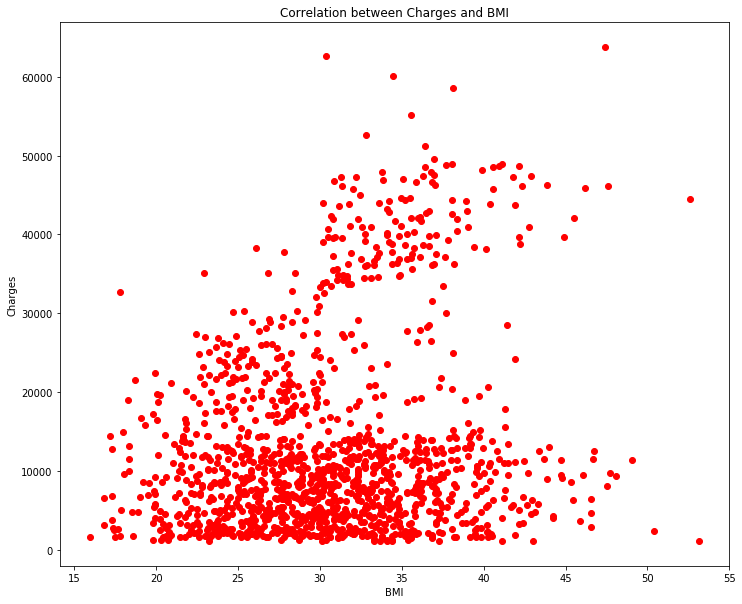

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,10))
plt.plot(numClientArray[:,1],numClientArray[:,4],"or")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Correlation between Charges and BMI")
plt.show()

Next, the histograms of the features
* BMI
* charges
* number of children

are plotted:

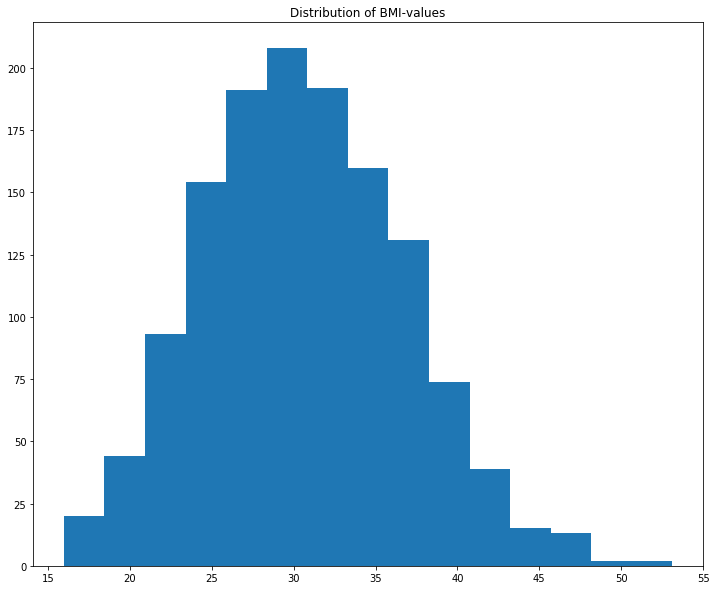

In [8]:
plt.figure(figsize=(12,10))
plt.hist(numClientArray[:,1],bins=15)
plt.title("Distribution of BMI-values")
plt.show()

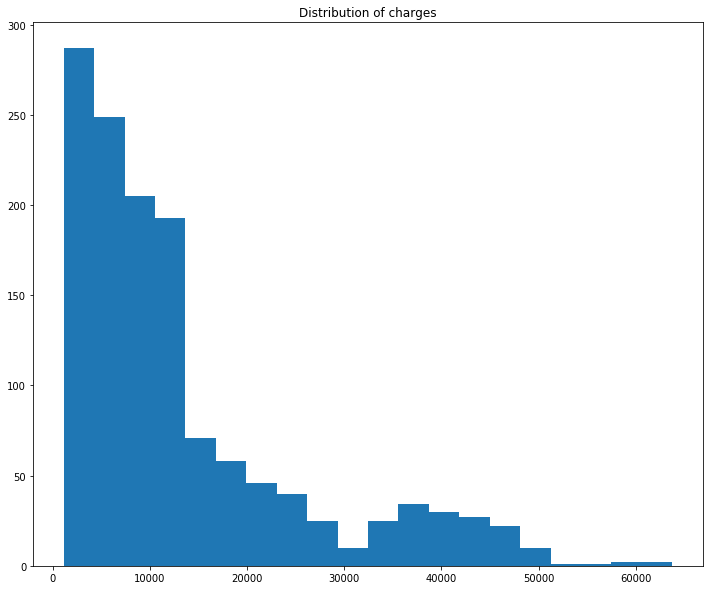

In [9]:
plt.figure(figsize=(12,10))
plt.hist(numClientArray[:,4],bins=20)
plt.title("Distribution of charges")
plt.show()

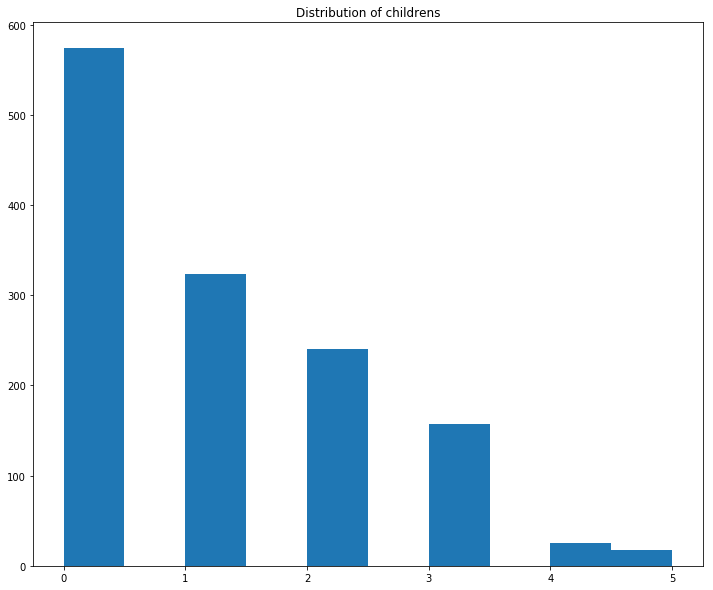

In [10]:
plt.figure(figsize=(12,10))
plt.hist(numClientArray[:,2])
plt.title("Distribution of childrens")
plt.show()